In [1]:
!pip install streamlit-option-menu

In [2]:
!pip install streamlit_folium

In [3]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

In [4]:
finalists_clean_df = pd.read_csv('Data/finalists_cleaned.csv')

In [5]:
# Display the first few rows to verify
print(finalists_clean_df.head())

   year  final_draw_position      country   style  final_televote_points  \
0  2023                   20       Norway     Pop                  216.0   
1  2023                    5       Serbia     Pop                   16.0   
2  2023                    2     Portugal     Pop                   16.0   
3  2023                   25      Croatia     Pop                  112.0   
4  2023                    3  Switzerland  Ballad                   31.0   

   final_jury_points  final_televote_votes  final_jury_votes  final_place  \
0               52.0                  36.0              11.0          5.0   
1               14.0                   4.0               6.0         24.0   
2               43.0                   3.0               9.0         23.0   
3               11.0                  20.0               2.0         13.0   
4               61.0                  10.0              15.0         20.0   

   final_total_points  
0               268.0  
1                30.0  
2       

In [6]:
finalists_clean_df.shape

(358, 10)

In [7]:
finalists_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   358 non-null    int64  
 1   final_draw_position    358 non-null    int64  
 2   country                358 non-null    object 
 3   style                  358 non-null    object 
 4   final_televote_points  326 non-null    float64
 5   final_jury_points      326 non-null    float64
 6   final_televote_votes   230 non-null    float64
 7   final_jury_votes       230 non-null    float64
 8   final_place            358 non-null    float64
 9   final_total_points     358 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 28.1+ KB


In [8]:
y = finalists_clean_df['final_place']

# Features: drop target and categorical variables
X = finalists_clean_df.drop(columns=['final_place', 'country', 'style','year', 'final_total_points'])

# Define numeric feature names (all remaining)
numeric_features = X.columns.tolist()


In [9]:
y.head()

0     5.0
1    24.0
2    23.0
3    13.0
4    20.0
Name: final_place, dtype: float64

In [10]:
# Split the dataset (74/26)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)


In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(264, 5)
(264,)
(94, 5)
(94,)


In [12]:
model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())
])

In [13]:
# Fit and predict
model.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [14]:
reg = model.named_steps['regressor']


In [15]:
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)

feature_names = X_train.columns
coef_table = list(zip(feature_names, reg.coef_))
for name, coef in coef_table:
    print(f"{name:30} {coef:>10.4f}")


Intercept: 22.67629864265806
Coefficients: [-0.03485454 -0.04062118 -0.0403899  -0.02779925 -0.06821816]
final_draw_position               -0.0349
final_televote_points             -0.0406
final_jury_points                 -0.0404
final_televote_votes              -0.0278
final_jury_votes                  -0.0682


In [16]:
y_pred = model.predict(X_test)

In [17]:
import sys
import os

# Use the current working directory instead of __file__
current_directory = os.getcwd()

# Add the path to the 'Modules' folder (adjust the path to reach the Modules folder)
sys.path.append(os.path.join(current_directory, 'Modules'))

# Now import the evalute function
from machine_learning.evaluate import evaluate_model

# Assuming you have your model, X_test, and y_test defined somewhere
evaluation_results = evaluate_model(model, X_test, y_test)

# Print the evaluation metrics in a formatted way
print("Model Evaluation Results:")
print("----------------------------")
for metric, value in evaluation_results.items():
    if metric != 'predictions':
        print(f"{metric}: {value:.4f}")
    else:
        print(f"\nPredictions (showing first 10 for brevity):")
        print(", ".join([f"{v:.2f}" for v in value[:10]]))  # Only show the first 10 predictions

Model Evaluation Results:
----------------------------
MAE: 2.9073
MSE: 12.8014
RMSE: 3.5779
R2: 0.7451

Predictions (showing first 10 for brevity):
20.09, 14.53, 14.94, 11.84, 18.33, 13.40, 17.96, 17.54, 13.20, 13.43


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred

array([20.09175253, 14.52593793, 14.94143027, 11.84458392, 18.33202704,
       13.39687678, 17.96386917, 17.5399432 , 13.20112618, 13.42812005,
       18.21266344, 12.99199893, 16.3193398 , 13.61938069, 19.05164715,
       19.37306338, 20.37378795, 15.316726  , 14.56076736, 13.3645743 ,
       12.68477084, 13.02685347, 13.65423523, 11.36289498, 16.21179654,
       14.47332606,  6.45913882,  7.50891001, 20.40195216, -1.54097396,
       16.23014406, -1.63823105, 14.18323474, 21.88772081, 11.54656102,
       15.29833666,  5.46812269, 14.32217484,  6.78435076, 18.11165136,
       19.55382092, 10.49429498,  6.63492669, 19.70001066, -0.37014876,
       13.54967161, 18.08050059,  4.67128236, 20.32727259, 17.90731732,
       17.46571021, 16.23924995, 13.05271465, 20.36227953, 13.07810554,
       17.42174033, 16.11865257, 16.87483816, 17.09781458, 13.30568981,
       17.72048199,  9.09961921, 13.70981063, 14.34403308, 21.8958745 ,
       18.79681505,  6.02831481, 19.72313875, 19.27477671,  7.57

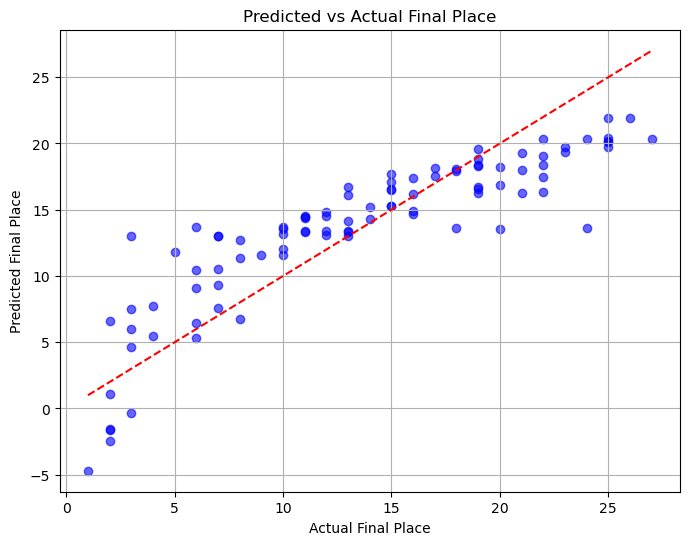

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal
plt.xlabel('Actual Final Place')
plt.ylabel('Predicted Final Place')
plt.title('Predicted vs Actual Final Place')
plt.grid(True)
plt.show()

In [20]:
y_test.iloc[0]

25.0

In [21]:
y_pred[0]

20.09175253089686

## Store model

In [23]:
import joblib

In [24]:
# Store the model in a file
model_file = 'Models/finalistfit.pkl'

In [25]:
# save the model
joblib.dump(model, model_file)

['Models/finalistfit.pkl']